In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./datalab/delhi-weather-data/testset.csv",parse_dates=['datetime_utc'],skipinitialspace=True,nrows=2000)

In [3]:
# plt.figure(figsize=(20, 10))
# p = sns.heatmap(df.corr(), annot=True)

In [4]:
df['Date'] = pd.to_datetime(df['datetime_utc'])
df['Year'] = df['Date'].dt.year

In [123]:
# plt.figure(figsize=(10,5))
# plt.ylabel("Dew")
# sns.lineplot(x="Year", y="_dewptm", data=df)

In [124]:
# df.Year.value_counts()

In [5]:
df['month'] = df.datetime_utc.dt.month

In [126]:
# plt.figure(figsize=(15, 10));
# sns.heatmap(pd.crosstab(df.Year, [df.month], values=df._tempm, aggfunc="mean"),
#             cmap="coolwarm", annot=True, cbar=True);
# plt.title("Average Temprature 1996-1998")
# plt.plot();

In [127]:
# p = sns.lineplot(x="Year", y="_fog", data=df)
# _ = plt.ylabel("Fog")

In [128]:
# p = sns.lineplot(x="Year", y="_hum", data=df)
# _ = plt.ylabel("Humidity")

In [10]:
# p = sns.lineplot(x="Year", y="_heatindexm", data=df)
# _ = plt.ylabel("Heat")

In [11]:
# p = sns.lineplot(x="Year", y="_rain", data=df)
# _ = plt.ylabel("Rain")

In [12]:
# plt.figure(figsize=(20, 10))
# p = sns.countplot(x='_conds', data=df)
# _ = plt.setp(p.get_xticklabels(), rotation=90)

In [13]:
# p = sns.lineplot(x="Year", y="_tempm", data=df)
# _ = plt.ylabel("Rain")

In [14]:
# p = sns.lineplot(x="Year", y="_tempm", data=df)
# _ = plt.ylabel("Dew")
# _ = plt.figure(figsize=(20,30))

In [6]:
feature_columns = ['_wdire', '_dewptm', '_fog', '_hail', '_hum',
       '_pressurem', '_rain', '_snow', '_tempm', '_thunder', '_tornado',
       '_vism', '_wdird', '_wspdm', 'Year', 'month', '_conds']

In [7]:
df.Year = df.Year.astype("object")
df.month = df.month.astype("object")

In [8]:
df_filtered = df[feature_columns]

## Fillna dew value by mean value of dew of each year

In [9]:
for index, row in df_filtered[df_filtered._dewptm.isnull()].iterrows():
#print(index)
#print(row)
    mean = df_filtered[df_filtered['Year'] == row['Year']]._dewptm.mean()
    df_filtered.at[index,'_dewptm'] = mean
#print(mean)
#break

## Fillna Humidity value by mean of Humidity of each year

In [10]:
for index, row in df_filtered[df_filtered._hum.isnull()].iterrows():
    mean = df_filtered[df_filtered['Year'] == row['Year']]._hum.mean()
    df_filtered.at[index,'_hum'] = mean

In [11]:
for index, row in df_filtered[df_filtered._tempm.isnull()].iterrows():
    mean = df_filtered[df_filtered['Year'] == row['Year']]._tempm.mean()
    df_filtered.at[index,'_tempm'] = mean

In [12]:
# df_filtered.isna().sum()

In [13]:
# df[df._pressurem == -9999.0]

In [14]:
import numpy as np

In [15]:
df_filtered._pressurem.replace(-9999.0, np.nan, inplace=True)

c:\python35\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
for index, row in df_filtered[df_filtered._pressurem.isnull()].iterrows():
    mean = df_filtered[df_filtered['Year'] == row['Year']]._pressurem.mean()
    df_filtered.at[index,'_pressurem'] = mean

In [17]:
for index, row in df_filtered[df_filtered._vism.isnull()].iterrows():
    mean = df_filtered[df_filtered['Year'] == row['Year']]._vism.mean()
    df_filtered.at[index,'_vism'] = mean

In [18]:
for index, row in df_filtered[df_filtered._wspdm.isnull()].iterrows():
    mean = df_filtered[df_filtered['Year'] == row['Year']]._wspdm.mean()
    df_filtered.at[index,'_wspdm'] = mean

In [19]:
# pd.crosstab(df_filtered.Year, [df_filtered.month], values=df_filtered._tempm, aggfunc="mean")

In [20]:
# df_filtered._conds.value_counts()

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
from sklearn import metrics

In [25]:
wdire_dummies = pd.get_dummies(df_filtered["_wdire"])

In [26]:
# wdire_dummies.head()

In [27]:
df_filtered = pd.concat([wdire_dummies, df_filtered],axis=1)

In [28]:
df_filtered.columns

Index(['ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE', 'SSE',
       'SSW', 'SW', 'South', 'WNW', 'WSW', 'West', '_wdire', '_dewptm', '_fog',
       '_hail', '_hum', '_pressurem', '_rain', '_snow', '_tempm', '_thunder',
       '_tornado', '_vism', '_wdird', '_wspdm', 'Year', 'month', '_conds'],
      dtype='object')

In [144]:
# df_filtered.drop(['datetime_utc'],axis=1, inplace=True)

In [29]:
df_filtered.drop(['_wdire', 'Year', 'month'], axis=1, inplace=True)

In [30]:
# df_filtered.NW = df_filtered.NW.astype(float)

In [31]:
X = df_filtered.iloc[:, 0:-1].values

In [32]:
# pd.set_option('display.max_columns', 500)
# df_filtered.head()

In [33]:
Y = df_filtered.iloc[:, -1].values

In [34]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

In [35]:
# from sklearn.linear_model import LogisticRegression

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=0)

In [37]:
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of Y_train", y_train.shape)
print("Shape of Y_test", y_test.shape)

Shape of X_train (1500, 29)
Shape of X_test (500, 29)
Shape of Y_train (1500,)
Shape of Y_test (500,)


In [38]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)

In [39]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [40]:
y_pred = clf.predict(X_test)

In [41]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.86


In [42]:
# pred_value = pd.DataFrame({'Actual':y_test.flatten() , 'Prediction':y_pred.flatten()}).reset_index()

In [43]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_pred1 = lr.predict(X_test)

In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.132
Mean Squared Error: 11.364
Root Mean Squared Error: 3.3710532478737267


In [48]:
pred_value = pd.DataFrame({'Actual':y_test.flatten() , 'Prediction':y_pred1.flatten()})

In [49]:
pred_value.head(26)

,Actual,Prediction
0,13,10.909714
1,13,9.718033
2,13,11.897968
3,13,14.119091
4,12,6.303162
5,13,11.119858
6,13,9.270958
7,2,4.307190
8,13,11.655556
9,0,10.572014


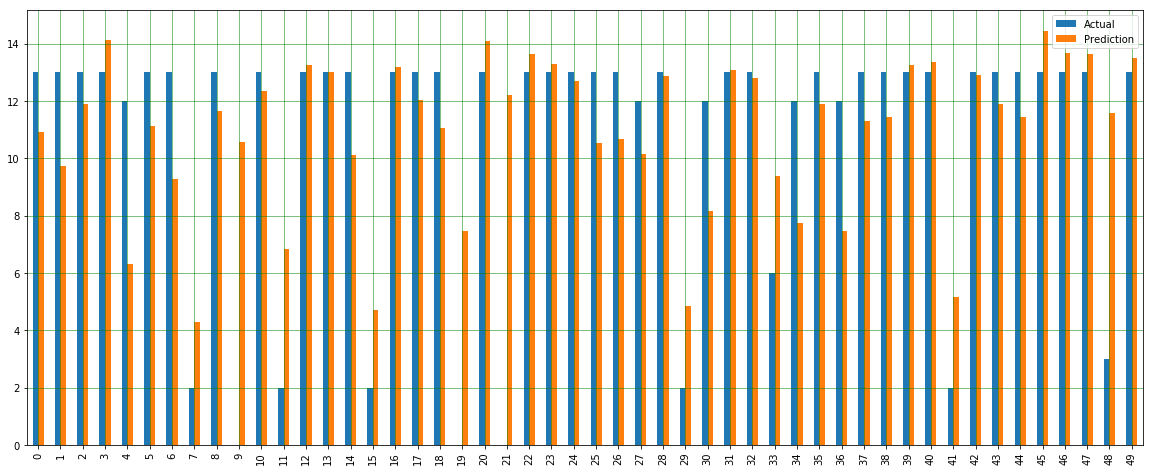

In [50]:
pred_value[:50].plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()